In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import itertools


In [160]:
data = pd.read_csv('/Users/harshitmasiwal/Downloads/Historical Product Demand.csv')
data

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016/4/27,1000
1048571,Product_1974,Whse_J,Category_006,2016/4/27,1
1048572,Product_1787,Whse_J,Category_006,2016/4/28,2500
1048573,Product_0901,Whse_J,Category_023,2016/10/7,50


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


#  A quick insightful statistical summary

In [162]:
data.describe().transpose()


,count,unique,top,freq
Product_Code,1048575,2160,Product_1359,16936
Warehouse,1048575,4,Whse_J,764447
Product_Category,1048575,33,Category_019,481099
Date,1037336,1729,2013/9/27,2075
Order_Demand,1048575,3828,1000,112682


# Duplicates are present in the dataset

In [163]:
data[data.duplicated()==True]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
10,Product_0979,Whse_J,Category_028,2012/8/29,500
39,Product_1159,Whse_J,Category_006,2012/8/30,50000
51,Product_1157,Whse_J,Category_006,2012/3/8,150000
55,Product_1157,Whse_J,Category_006,2012/6/4,160000
67,Product_1274,Whse_J,Category_019,2012/1/24,1000
...,...,...,...,...,...
1048508,Product_1148,Whse_J,Category_006,2016/9/1,5000
1048521,Product_1391,Whse_J,Category_019,2016/6/3,100
1048531,Product_1391,Whse_J,Category_019,2016/8/22,100
1048568,Product_1759,Whse_J,Category_001,2016/8/17,1


# dropping the duplicates

In [164]:
data = data.drop_duplicates()

# Missing values are also present in the dataset

In [165]:
data.isnull().sum()

Product_Code           0
Warehouse              0
Product_Category       0
Date                1880
Order_Demand           0
dtype: int64

 # Changing datetime object type

In [166]:
data.loc[:,'Date'] = pd.to_datetime(data.loc[:,'Date'], format='%Y/%m/%d', errors='coerce')
data['Date']

0          2012-07-27 00:00:00
1          2012-01-19 00:00:00
2          2012-02-03 00:00:00
3          2012-02-09 00:00:00
4          2012-03-02 00:00:00
                  ...         
1048569    2016-11-10 00:00:00
1048571    2016-04-27 00:00:00
1048572    2016-04-28 00:00:00
1048573    2016-10-07 00:00:00
1048574    2016-06-27 00:00:00
Name: Date, Length: 926152, dtype: object

In [167]:
data.isnull().sum()

Product_Code           0
Warehouse              0
Product_Category       0
Date                1880
Order_Demand           0
dtype: int64

# dropping the NaN Values

In [168]:

if 'Date' in data.columns:
    data = data.dropna(subset=['Date']).copy()
data.isnull().sum()



Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64

# filling the missing values present in the date

In [169]:
start_date = pd.to_datetime('2012-01-01')
end_date = pd.to_datetime('2016-12-31')
data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

In [170]:
data.isnull().sum()   

Product_Code        0
Warehouse           0
Product_Category    0
Date                0
Order_Demand        0
dtype: int64


# Adding some columns like weekdays, years, weekends

In [171]:
wkday = []
for i in range(len(data)):
    wkday.append(data['Date'].iloc[i].weekday())
yr = []
for i in range(len(data)):
    yr.append(data['Date'].iloc[i].year)

mon = []
for i in range(len(data)):
    mon.append(data['Date'].iloc[i].month)

In [172]:
data.loc[:,'weekday'] = wkday
data.loc[:,'year'] = yr
data.loc[:,'month'] = mon

In [173]:
print(data.columns)
print(data.index)



Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date', 'Order_Demand',
       'weekday', 'year', 'month'],
      dtype='object')
Index([      0,       1,       2,       3,       4,       5,       6,       7,
             8,       9,
       ...
       1048563, 1048564, 1048565, 1048566, 1048567, 1048569, 1048571, 1048572,
       1048573, 1048574],
      dtype='int64', length=923607)


In [174]:
data.set_index('Date',inplace=True)


/opt/anaconda3/lib/python3.12/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [175]:
data.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month
Date,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,4,2012,7
2012-01-19,Product_0979,Whse_J,Category_028,500,3,2012,1
2012-02-03,Product_0979,Whse_J,Category_028,500,4,2012,2
2012-02-09,Product_0979,Whse_J,Category_028,500,3,2012,2
2012-03-02,Product_0979,Whse_J,Category_028,500,4,2012,3


In [176]:
def weekend(day):
    if day == 5 or day == 6:
        return 1
    else:
        return 0

In [177]:
data.loc[:,'Weekend'] = data['weekday'].apply(weekend)

In [178]:
data[data['Weekend'] == 1].head()


,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month,Weekend
Date,,,,,,,,
2012-08-25,Product_1241,Whse_S,Category_019,30000,5,2012,8,1
2012-08-25,Product_1570,Whse_S,Category_019,90000,5,2012,8,1
2012-08-25,Product_1904,Whse_S,Category_019,100000,5,2012,8,1
2012-11-04,Product_1241,Whse_S,Category_019,100000,6,2012,11,1
2012-11-04,Product_1570,Whse_S,Category_019,85000,6,2012,11,1


In [179]:
data.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Order_Demand',
       'weekday', 'year', 'month', 'Weekend'],
      dtype='object')

In [180]:
data['Warehouse'].value_counts(ascending=False)

Warehouse
Whse_J    665388
Whse_A    130618
Whse_S     86042
Whse_C     41559
Name: count, dtype: int64

# Extracting rows corresponding to Warehouse J

In [181]:
dataJ = data[data['Warehouse']== 'Whse_J']

In [182]:
dataJ.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month,Weekend
Date,,,,,,,,
2012-07-27,Product_0993,Whse_J,Category_028,100,4,2012,7,0
2012-01-19,Product_0979,Whse_J,Category_028,500,3,2012,1,0
2012-02-03,Product_0979,Whse_J,Category_028,500,4,2012,2,0
2012-02-09,Product_0979,Whse_J,Category_028,500,3,2012,2,0
2012-03-02,Product_0979,Whse_J,Category_028,500,4,2012,3,0


# Key Observations:
 1. Focused on Warehouse J to study warehouse-specific demand patterns.
 2. Multiple products exist, mainly Category_028 in this subset.
 3. Order demand varies (100 to 500 units), showing high variability.
 4. Columns like 'day', 'month', 'year', and 'weekend' allow time-based analysis.
 5. Data is indexed by 'Date', useful for trends and forecasting.

 # Grouping the data by Date, Product_Category, Warehouse and Order_Demand

In [183]:
# Group by Date, Product_Category, and Warehouse to get daily total demand
# This ensures each group has a single value for forecasting and trend analysis
tdata = data.groupby(['Date', 'Product_Category', 'Warehouse'])['Order_Demand'].sum().reset_index()

In [184]:
tdata.head()

,Date,Product_Category,Warehouse,Order_Demand
0,2012-01-01,Category_024,Whse_S,2
1,2012-01-02,Category_001,Whse_S,4 3 100
2,2012-01-02,Category_005,Whse_S,2000 500 1000
3,2012-01-02,Category_006,Whse_S,8000 2500 2500
4,2012-01-02,Category_011,Whse_S,5 20


 # Key Observations 

Each row represents an order for a specific Product_Category in a Warehouse on a given Date.
Multiple rows can exist for the same date and warehouse (e.g., 2012-01-02 has multiple categories).
'Order_Demand' values vary greatly:
 Some are small (e.g., 2, 4, 5 units)
 Some are very large (e.g., 8000, 2000)
 This indicates high variability in demand between products.
 Some rows show multiple values in 'Order_Demand' (e.g., 2000 500 1000), which might be a data entry issue.
 Warehouses are labeled (e.g., 'Whse_S'), which allows warehouse-level analysis.
The dataset is time-indexed by 'Date', useful for trend, seasonal, and forecasting analysis.


# Displaying the Warehouse with minimum Order Demand

In [185]:
min_order = tdata.loc[tdata['Order_Demand'].idxmin()]
min_order   

Date                2012-03-15 00:00:00
Product_Category           Category_003
Warehouse                        Whse_J
Order_Demand                        (1)
Name: 2762, dtype: object

# Displaying the Warehouse with maximum Order Demand

In [186]:
max_order = tdata.loc[tdata['Order_Demand'].idxmax()]
max_order

Date                2015-04-16 00:00:00
Product_Category           Category_011
Warehouse                        Whse_S
Order_Demand                       999 
Name: 47226, dtype: object

33


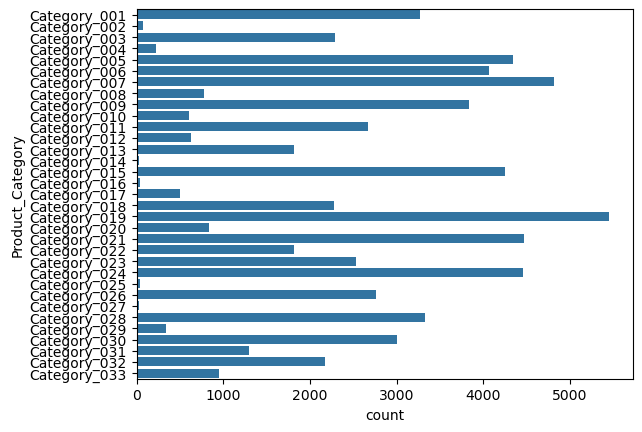

In [187]:
print (len(tdata['Product_Category'].value_counts()))

sns.countplot(tdata['Product_Category'].sort_values(ascending = True))
plt.show()


Category19 has a lot of orders

# Converting Categorical Variables into Numerical Variables

In [188]:
data['Order_Demand'] = pd.to_numeric(data['Order_Demand'],errors='coerce')


In [189]:
le = LabelEncoder()

data['Product_Code'] = le.fit_transform(data['Product_Code'])
data['Warehouse'] = le.fit_transform(data['Warehouse'])
data['Product_Category'] = le.fit_transform(data['Product_Category'])

In [190]:
data.head()

,Product_Code,Warehouse,Product_Category,Order_Demand,weekday,year,month,Weekend
Date,,,,,,,,
2012-07-27,982,2,27,100.0,4,2012,7,0
2012-01-19,968,2,27,500.0,3,2012,1,0
2012-02-03,968,2,27,500.0,4,2012,2,0
2012-02-09,968,2,27,500.0,3,2012,2,0
2012-03-02,968,2,27,500.0,4,2012,3,0


# Plotting the Monthly Order Demand Trend Over the Years

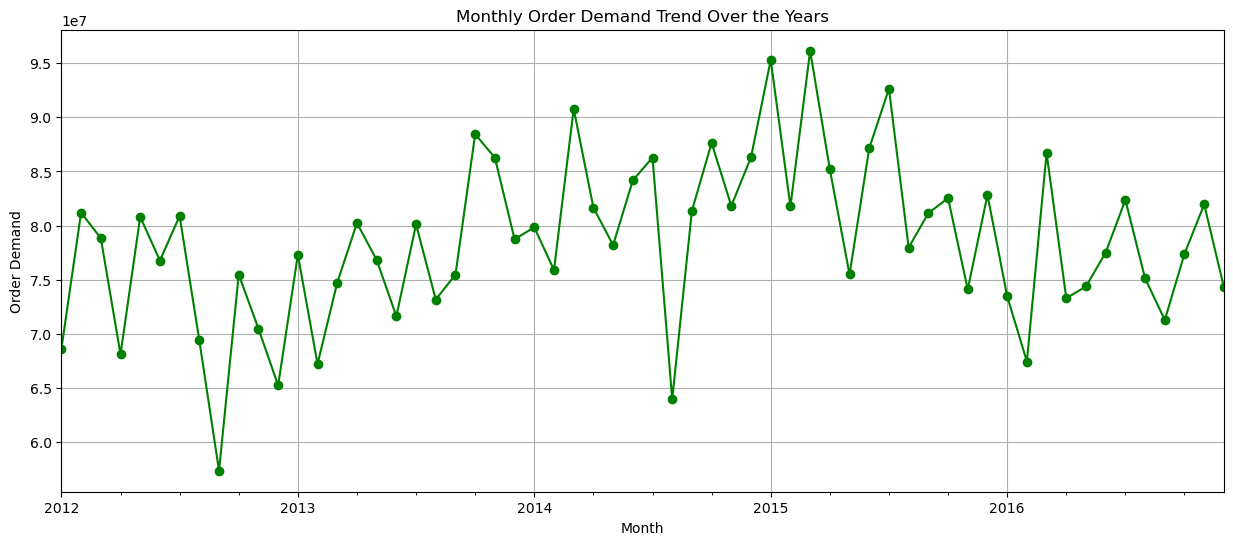

In [191]:
monthly_data = data['Order_Demand'].resample('ME').sum()
plt.figure(figsize=(15,6))
monthly_data.plot(kind='line', marker='o', c='green')
plt.title('Monthly Order Demand Trend Over the Years')
plt.xlabel('Month')
plt.ylabel('Order Demand')
plt.grid(True)
plt.show()


# Plotting the Weekly Order Demand Trend Over Time
Weekly data illustrates the seasonality much better than monthly data, but we'll work with monthly data because handling large lag values in weekly data is difficult

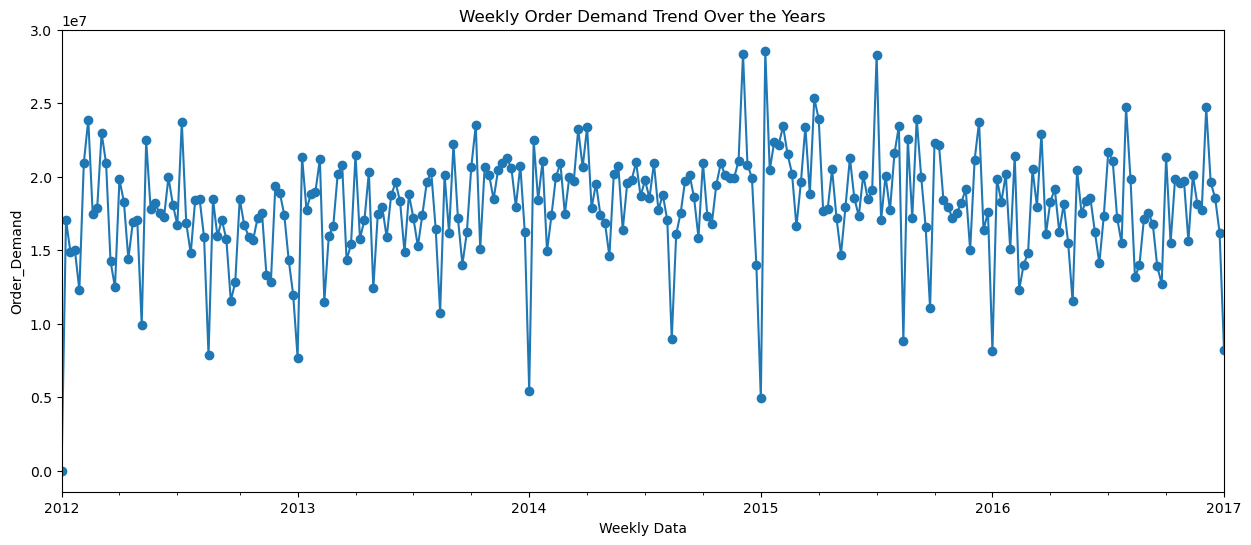

In [192]:
w_data = data['Order_Demand'].resample('W').sum()

plt.figure(figsize=(15,6))
w_data.plot(kind='line', marker='o')
plt.title('Weekly Order Demand Trend Over the Years')
plt.xlabel('Weekly Data')
plt.ylabel('Order_Demand')
plt.show()

# Perform the Augmented Dickey-Fuller test to check for stationarity

In [193]:
result = adfuller(monthly_data)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[1] < 0.05:
    print("Stationary.")
else:
    print("Non-stationary.") 

ADF Statistic: -2.112796
p-value: 0.239401
Critical Values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
Non-stationary.


# Observations from Augmented Dickey-Fuller Test:
- ADF Statistic: -2.112796 (not very negative)
- p-value: 0.239401 (greater than 0.05)
-  Critical Values: 
-     1%: -3.551
-     5%: -2.914
-     10%: -2.595
- The p-value is much higher than 0.05, and the ADF Statistic is above the critical values.
- Conclusion: The time series is non-stationary (it has trends or changing variance).
- Next step: Apply differencing or transformation to make the series stationary before forecasting.


# Plotting ACF and PACF of the monthly data of the Order Demand
Understanding ACF and PACF as it is vital for analyzing time series data.



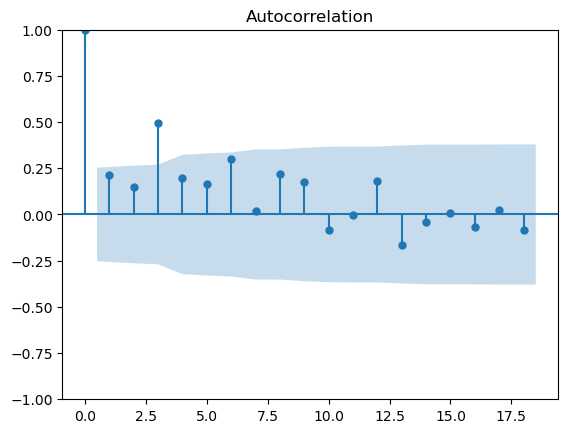

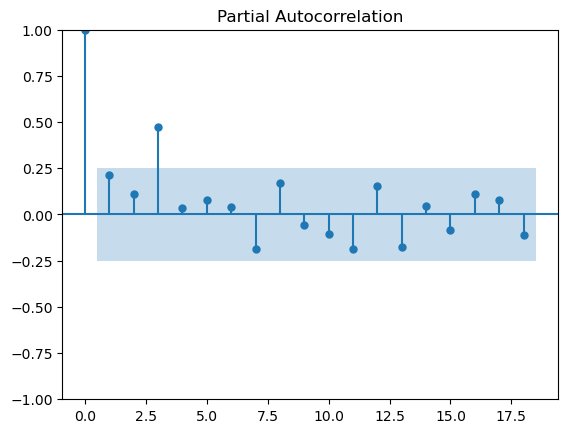

In [194]:
plot_acf(monthly_data)
plot_pacf(monthly_data)
plt.show()

 - Plot ACF and PACF to analyze correlation of the order demand with its past values.
 -  ACF helps to choose the number of MA (q) terms.
 - PACF helps to choose the number of AR (p) terms in the SARIMA model


# Plotting autocorrelation of monthly order demand trend

- Additional insights into the data.
- Helps validate the results obtained from the plots.
- Identifying non-stationarity, determining optimal lag, and refining the forecasting model.

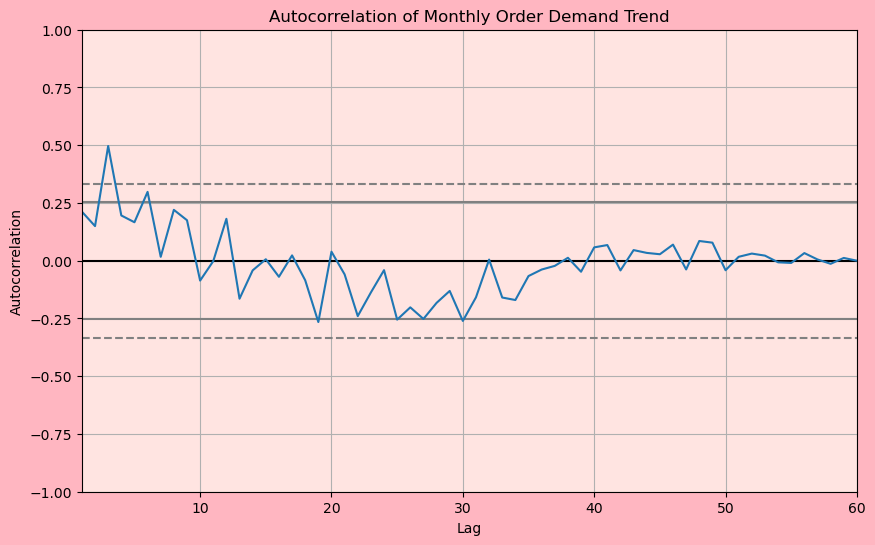

In [195]:
plt.figure(figsize=(10, 6), facecolor='lightpink')
autocorrelation_plot(monthly_data)
plt.gca().set_facecolor('mistyrose')
plt.title('Autocorrelation of Monthly Order Demand Trend')
plt.show()

# Observations:
-  Only the first lag spike is above the confidence interval, indicating that the previous month's sales 
    have a significant effect on the current month's sales.
-  All other spikes fall within the confidence interval, showing that sales from earlier months 
-    do not have a significant impact.
-  The rest of the autocorrelation values represent random noise or fluctuations in sales.
-  There is no strong seasonality in the monthly order demand; the series shows mostly short-term dependency.

In [196]:
for lag in range(1, 6): 
    print(f"Lag {lag} corresponds to {monthly_data.index[-lag].strftime('%b %Y')}")


Lag 1 corresponds to Dec 2016
Lag 2 corresponds to Nov 2016
Lag 3 corresponds to Oct 2016
Lag 4 corresponds to Sep 2016
Lag 5 corresponds to Aug 2016


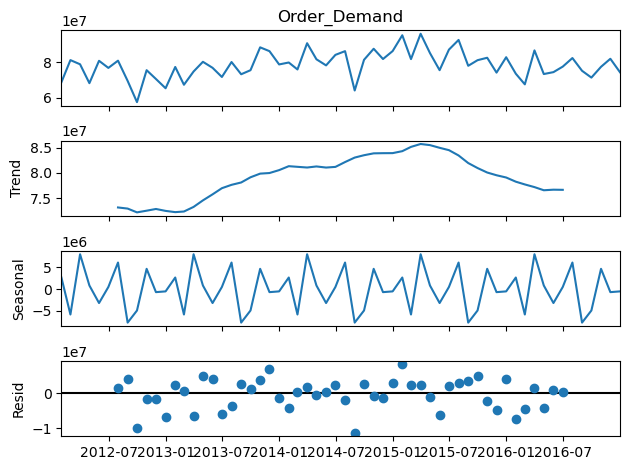

In [197]:
decomposition = sm.tsa.seasonal_decompose(monthly_data, model='additive')

fig = decomposition.plot()
plt.show()

 - Determining d

 - Differenced the time series data to make it stationary. Stationarity, meaning that the statistical properties of the data (mean, variance, autocorrelation) do not change over time, is essential for accurate forecasting and analysis.
 - Differencing helps achieve stationarity by removing trends and seasonality, which are common sources of non-stationarity.
 - Using the ADF test to determine how many degrees of differencing is sufficient to make it stationary, making it suitable for further analysis and modeling
 - d=1 as first order differencing is sufficient to make the series stationary.

adf: -12.624649976147643
pvalue: 1.5511405035507278e-23


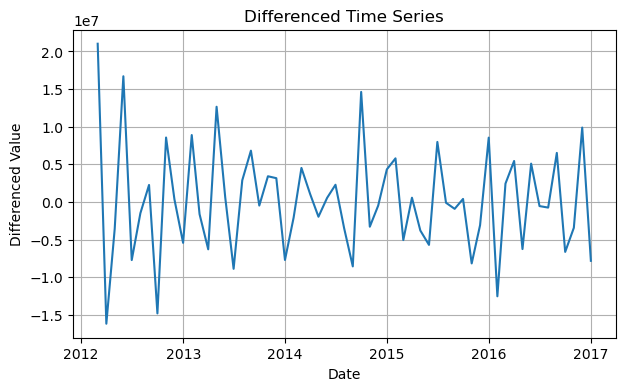

In [198]:
first_order_diff = deseasonalised_data.diff()
adf, pvalue, _, _, _, _ = adfuller(first_order_diff.dropna())

print(f'adf: {adf}')
print(f'pvalue: {pvalue}')

plt.figure(figsize=(7, 4))
plt.plot(first_order_diff.dropna())
plt.title('Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.grid(True)
plt.show()


# Observations:
-  First-order differencing was applied to the deseasonalised series to remove the trend.
-  The ADF test statistic is -12.6246 and the p-value is ~0, indicating the series is stationary.
-  The differenced series fluctuates around a constant mean with no obvious trend.
-  Since the series is stationary, it is now suitable for ARIMA/SARIMA modeling for forecasting.


 # Determining q

 # Determined q = 3 by visualizing ACF

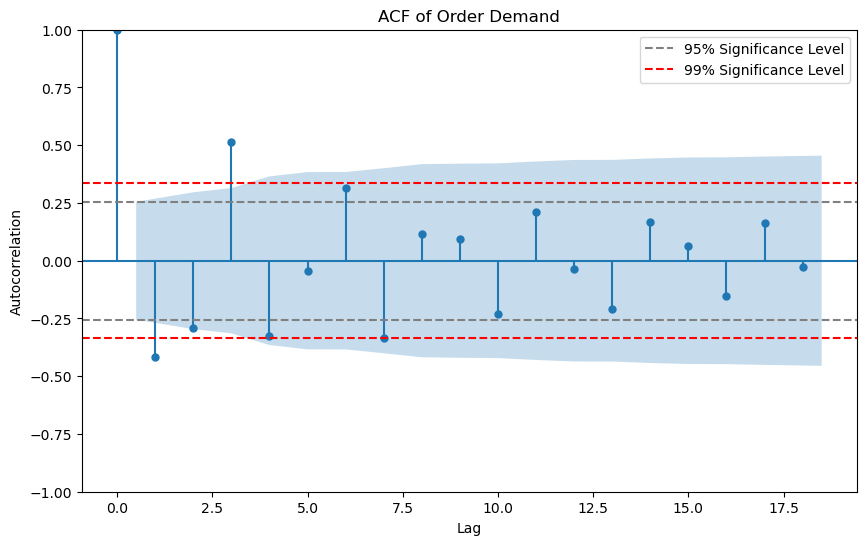

In [199]:
first_order_diff = first_order_diff.dropna()
crit_val_95 = 1.96 / (len(first_order_diff)**0.5)  # For 95% confidence interval
crit_val_99 = 2.58 / (len(first_order_diff)**0.5)  # For 99% confidence interval

fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(first_order_diff, ax=ax, alpha=0.05)

ax.axhline(y=crit_val_95, linestyle='--', color='gray', linewidth=1.5, label='95% Significance Level')
ax.axhline(y=-crit_val_95, linestyle='--', color='gray', linewidth=1.5)
ax.axhline(y=crit_val_99, linestyle='--', color='red', linewidth=1.5, label='99% Significance Level')
ax.axhline(y=-crit_val_99, linestyle='--', color='red', linewidth=1.5)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('ACF of Order Demand')
plt.legend()
plt.show()

# Observations from ACF plot:
- The ACF plot shows the correlation of the differenced series with its past values (lags).
- Spikes outside the 95%  and 99%  confidence lines are statistically significant.
- Significant spikes appear at lag 1, 2, and 3, indicating that the previous three months’ errors 
   influence the current month’s order demand.
- After lag 3, autocorrelations drop within the confidence bounds, suggesting no further significant 
   correlation with older lags.
-  Based on this observation, the MA (q) term for ARIMA/SARIMA is chosen as q = 3.

 # DETERMINING p

 # Determined p = 3 by visualizing PACF

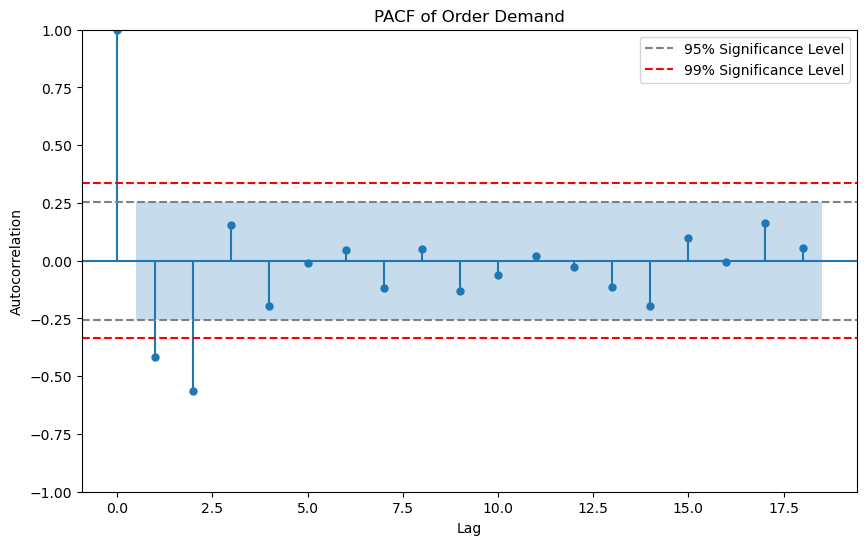

In [200]:
crit_val_95 = 1.96 / (len(first_order_diff)**0.5)  # For 95% confidence interval
crit_val_99 = 2.58 / (len(first_order_diff)**0.5)  # For 99% confidence interval

fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(first_order_diff, ax=ax)

ax.axhline(y=crit_val_95, linestyle='--', color='gray', linewidth=1.5, label='95% Significance Level')
ax.axhline(y=-crit_val_95, linestyle='--', color='gray', linewidth=1.5)
ax.axhline(y=crit_val_99, linestyle='--', color='red', linewidth=1.5, label='99% Significance Level')
ax.axhline(y=-crit_val_99, linestyle='--', color='red', linewidth=1.5)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('PACF of Order Demand')
plt.legend()

 # Model Selection - SARIMA

 - Using Grid Search for parameter tuning
 - Trying all combinations within this range to find the best parameters for this model

In [205]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

d = range(1, 2)
p = range(0, 4)
q = range(0, 4)
P = D = Q = range(0, 2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in itertools.product(P, D, Q)]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = SARIMAX(monthly_data, order=param, seasonal_order=param_seasonal,
                            enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as e:
            print(f"Error for SARIMA{param}x{param_seasonal}: {str(e)}")
            continue


SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2028.58767760211
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1599.9717795304819
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1608.1163517910684
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3183.7355840375567
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1632.654922007457
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1599.2608557984554
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1221.8671165489352
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:3172.001378416046
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1964.86928443255
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1549.5820438449957
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1561.492649199139
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:3089.4723299540274
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1617.9436208076334
SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1548.899680468084
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1213.8385569997076
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:3078.32032931195
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1931.2905147130919
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:151

# Best parameters are SARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:1105.1127017725232

In [206]:
model = SARIMAX(monthly_data,
                order=(3, 1, 0),
                seasonal_order=(1, 1, 0, 12),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                       Order_Demand   No. Observations:                   60
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -547.556
Date:                            Sat, 13 Sep 2025   AIC                           1105.113
Time:                                    01:20:57   BIC                           1112.441
Sample:                                01-31-2012   HQIC                          1107.542
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5574      0.227     -2.451      0.014      -1.003      -0.112
ar.L2         -0.4232      0.257   

 # Forecasting future demand for next 6 months

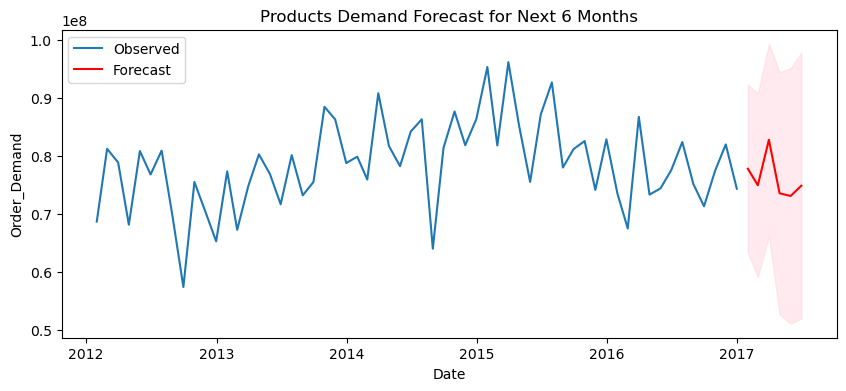

In [207]:
forecast_periods = 6 
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10, 4))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title("Products Demand Forecast for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Order_Demand")
plt.legend()

#  Key Observation -
 The graph shows the product demand forecast for the next 6 months based on past data. The blue line shows the historical demand, and the red line shows the predicted future demand. We can observe that the forecast predicts a slight decrease in demand compared to the last few months of the observed data. The pink shaded area shows the confidence interval, meaning the actual future demand is likely to fall within this range. As time goes forward, the uncertainty increases, so the confidence interval becomes wider. This forecast helps us plan how much stock or production we need for the upcoming 6 months to avoid overstocking or running out of products.
